In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d

path = "/content/November-rain.wav"

In [ ]:
# Generar señal

Y, fs = librosa.load(path, sr=None)  # sr=None conserva la frecuencia de muestreo original

if len(Y.shape) > 1:  #Audio MONO
    Y = Y.mean(axis=1)
N = len(Y)
# Crear un array de tiempo
X = np.linspace(0, len(Y) / fs, len(Y))

nperseg = 1024  # Tamaño de la ventana
noverlap = nperseg // 2  # Traslape de las ventanas

frequencies, Sxx = welch(Y, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Graficar los resultados
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
axs[0].plot(X, Y)
axs[0].set_title('Señal')
axs[1].plot(frequencies, Sxx, 'b')
axs[1].set_title('Espectro de Potencia')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.show()

<ipython-input-2-80f02b5fe888>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  Y, fs = librosa.load(path, sr=None)  # sr=None conserva la frecuencia de muestreo original
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/November-rain.wav'

In [ ]:
# Interpolar Sxx para tener el mismo tamaño que y
f = interp1d(frequencies, Sxx, kind='linear')
frequencies_interp = np.linspace(frequencies.min(), frequencies.max(), len(X))
Sxx_interp = f(frequencies_interp)

# Concatenar y Sxx_interp
data = np.column_stack((Y, Sxx_interp))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)



In [ ]:
# Definir y entrenar el modelo de TensorFlow (ejemplo)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

Epoch 1/50
7296/7296 [==============================] - 24s 3ms/step - loss: 2.7984e-06 - val_loss: 2.0656e-06
Epoch 2/50
7296/7296 [==============================] - 21s 3ms/step - loss: 3.2087e-07 - val_loss: 9.2447e-09
Epoch 3/50
7296/7296 [==============================] - 22s 3ms/step - loss: 2.2536e-07 - val_loss: 1.6517e-07
Epoch 4/50
7296/7296 [==============================] - 20s 3ms/step - loss: 1.9392e-07 - val_loss: 2.9056e-07
Epoch 5/50
7296/7296 [==============================] - 21s 3ms/step - loss: 1.6626e-07 - val_loss: 9.8425e-09
Epoch 6/50
7296/7296 [==============================] - 21s 3ms/step - loss: 1.4300e-07 - val_loss: 2.1715e-08
Epoch 7/50
7296/7296 [==============================] - 23s 3ms/step - loss: 1.3762e-07 - val_loss: 1.4883e-07
Epoch 8/50
7296/7296 [==============================] - 23s 3ms/step - loss: 1.1989e-07 - val_loss: 1.2775e-07
Epoch 9/50
7296/7296 [==============================] - 20s 3ms/step - loss: 1.0893e-07 - val_loss: 4.5270e-08
E

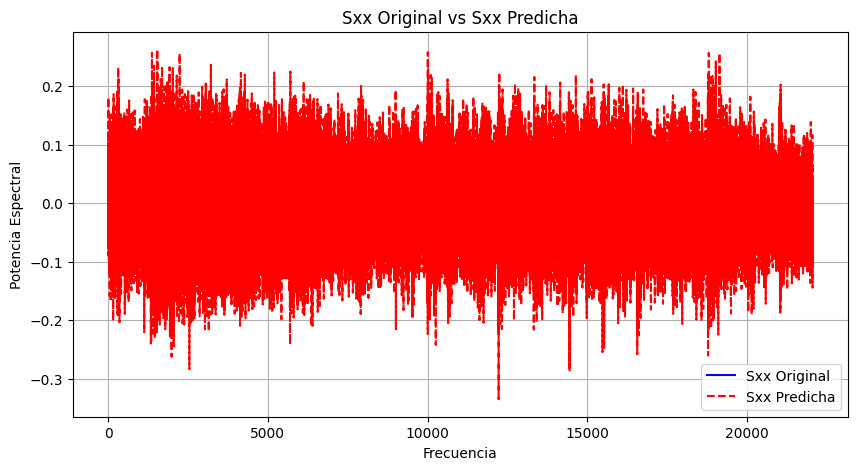

In [ ]:
# Predicción de Sxx usando el modelo
Sxx_pred = model.predict(data)

# Graficar Sxx_pred vs Sxx
plt.figure(figsize=(10, 5))
plt.plot(frequencies_interp, Sxx_interp, label='Sxx Original', color='blue')
plt.plot(frequencies_interp, Sxx_pred, label='Sxx Predicha', color='red', linestyle='--')
plt.title('Sxx Original vs Sxx Predicha')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia Espectral')
plt.legend()
plt.grid(True)
plt.show()